In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
cancer_df = pd.read_csv('cervical_cancer.csv')

In [3]:
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
cancer_df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


# Data Imputation

In [7]:
cancer_df = cancer_df.replace('?', np.nan)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [8]:
cancer_df.notna().sum()

Age                                   858
Number of sexual partners             832
First sexual intercourse              851
Num of pregnancies                    802
Smokes                                845
Smokes (years)                        845
Smokes (packs/year)                   845
Hormonal Contraceptives               750
Hormonal Contraceptives (years)       750
IUD                                   741
IUD (years)                           741
STDs                                  753
STDs (number)                         753
STDs:condylomatosis                   753
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           753
STDs:vulvo-perineal condylomatosis    753
STDs:syphilis                         753
STDs:pelvic inflammatory disease      753
STDs:genital herpes                   753
STDs:molluscum contagiosum            753
STDs:AIDS                             753
STDs:HIV                              753
STDs:Hepatitis B                  

In [9]:
#since STDs: Time since first diagnosis & STDs: Time since last diagnosis has very less number
cancer_df = cancer_df.drop(columns = ['STDs: Time since first diagnosis' , 'STDs: Time since last diagnosis'])

In [10]:
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [11]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
columns_1=['Smokes (years)','STDs', 'IUD (years)', 'IUD']

for column in cancer_df:
    if column in columns_1:
        cancer_df[column] = cancer_df[column].fillna(cancer_df[column].mean())
    else:
        cancer_df[column] = cancer_df[column].fillna(cancer_df[column].median())
    

In [13]:
print(cancer_df.isnull().sum(), cancer_df.notna().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [14]:
corr_mat = cancer_df.corr()
corr_mat

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.369175,0.525892,0.057204,0.217349,0.131861,0.029201,0.295267,0.267662,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.145847,0.077439,0.236858,0.177628,0.174968,0.004027,0.021188,0.031962,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.369175,-0.145847,1.000000,-0.056374,-0.123280,-0.058365,-0.056232,-0.009232,0.025071,-0.020980,...,0.034728,-0.013331,0.067281,-0.032628,0.043964,0.035748,-0.016549,0.003489,-0.010974,0.007259
Num of pregnancies,0.525892,0.077439,-0.056374,1.000000,0.081517,0.174862,0.096976,0.118938,0.218805,0.197301,...,-0.026153,0.034912,0.036962,-0.002600,0.048578,0.014227,0.037809,0.085810,-0.027675,0.040215
Smokes,0.057204,0.236858,-0.123280,0.081517,1.000000,0.722196,0.493843,0.004036,0.041979,-0.052756,...,0.049193,0.090725,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
Smokes (years),0.217349,0.177628,-0.058365,0.174862,0.722196,1.000000,0.723888,-0.014596,0.050766,0.027562,...,0.051016,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131861,0.174968,-0.056232,0.096976,0.493843,0.723888,1.000000,0.001713,0.043262,0.007079,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives,0.029201,0.004027,-0.009232,0.118938,0.004036,-0.014596,0.001713,1.000000,0.385833,0.031568,...,0.032666,-0.062199,0.011278,-0.004397,0.028808,-0.007245,0.012360,-0.034002,-0.025116,-0.018015
Hormonal Contraceptives (years),0.295267,0.021188,0.025071,0.218805,0.041979,0.050766,0.043262,0.385833,1.000000,0.094335,...,0.053756,-0.028285,0.062971,0.003793,0.065640,-0.009136,0.051093,0.096702,0.082537,0.094164
IUD,0.267662,0.031962,-0.020980,0.197301,-0.052756,0.027562,0.007079,0.031568,0.094335,1.000000,...,-0.018473,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


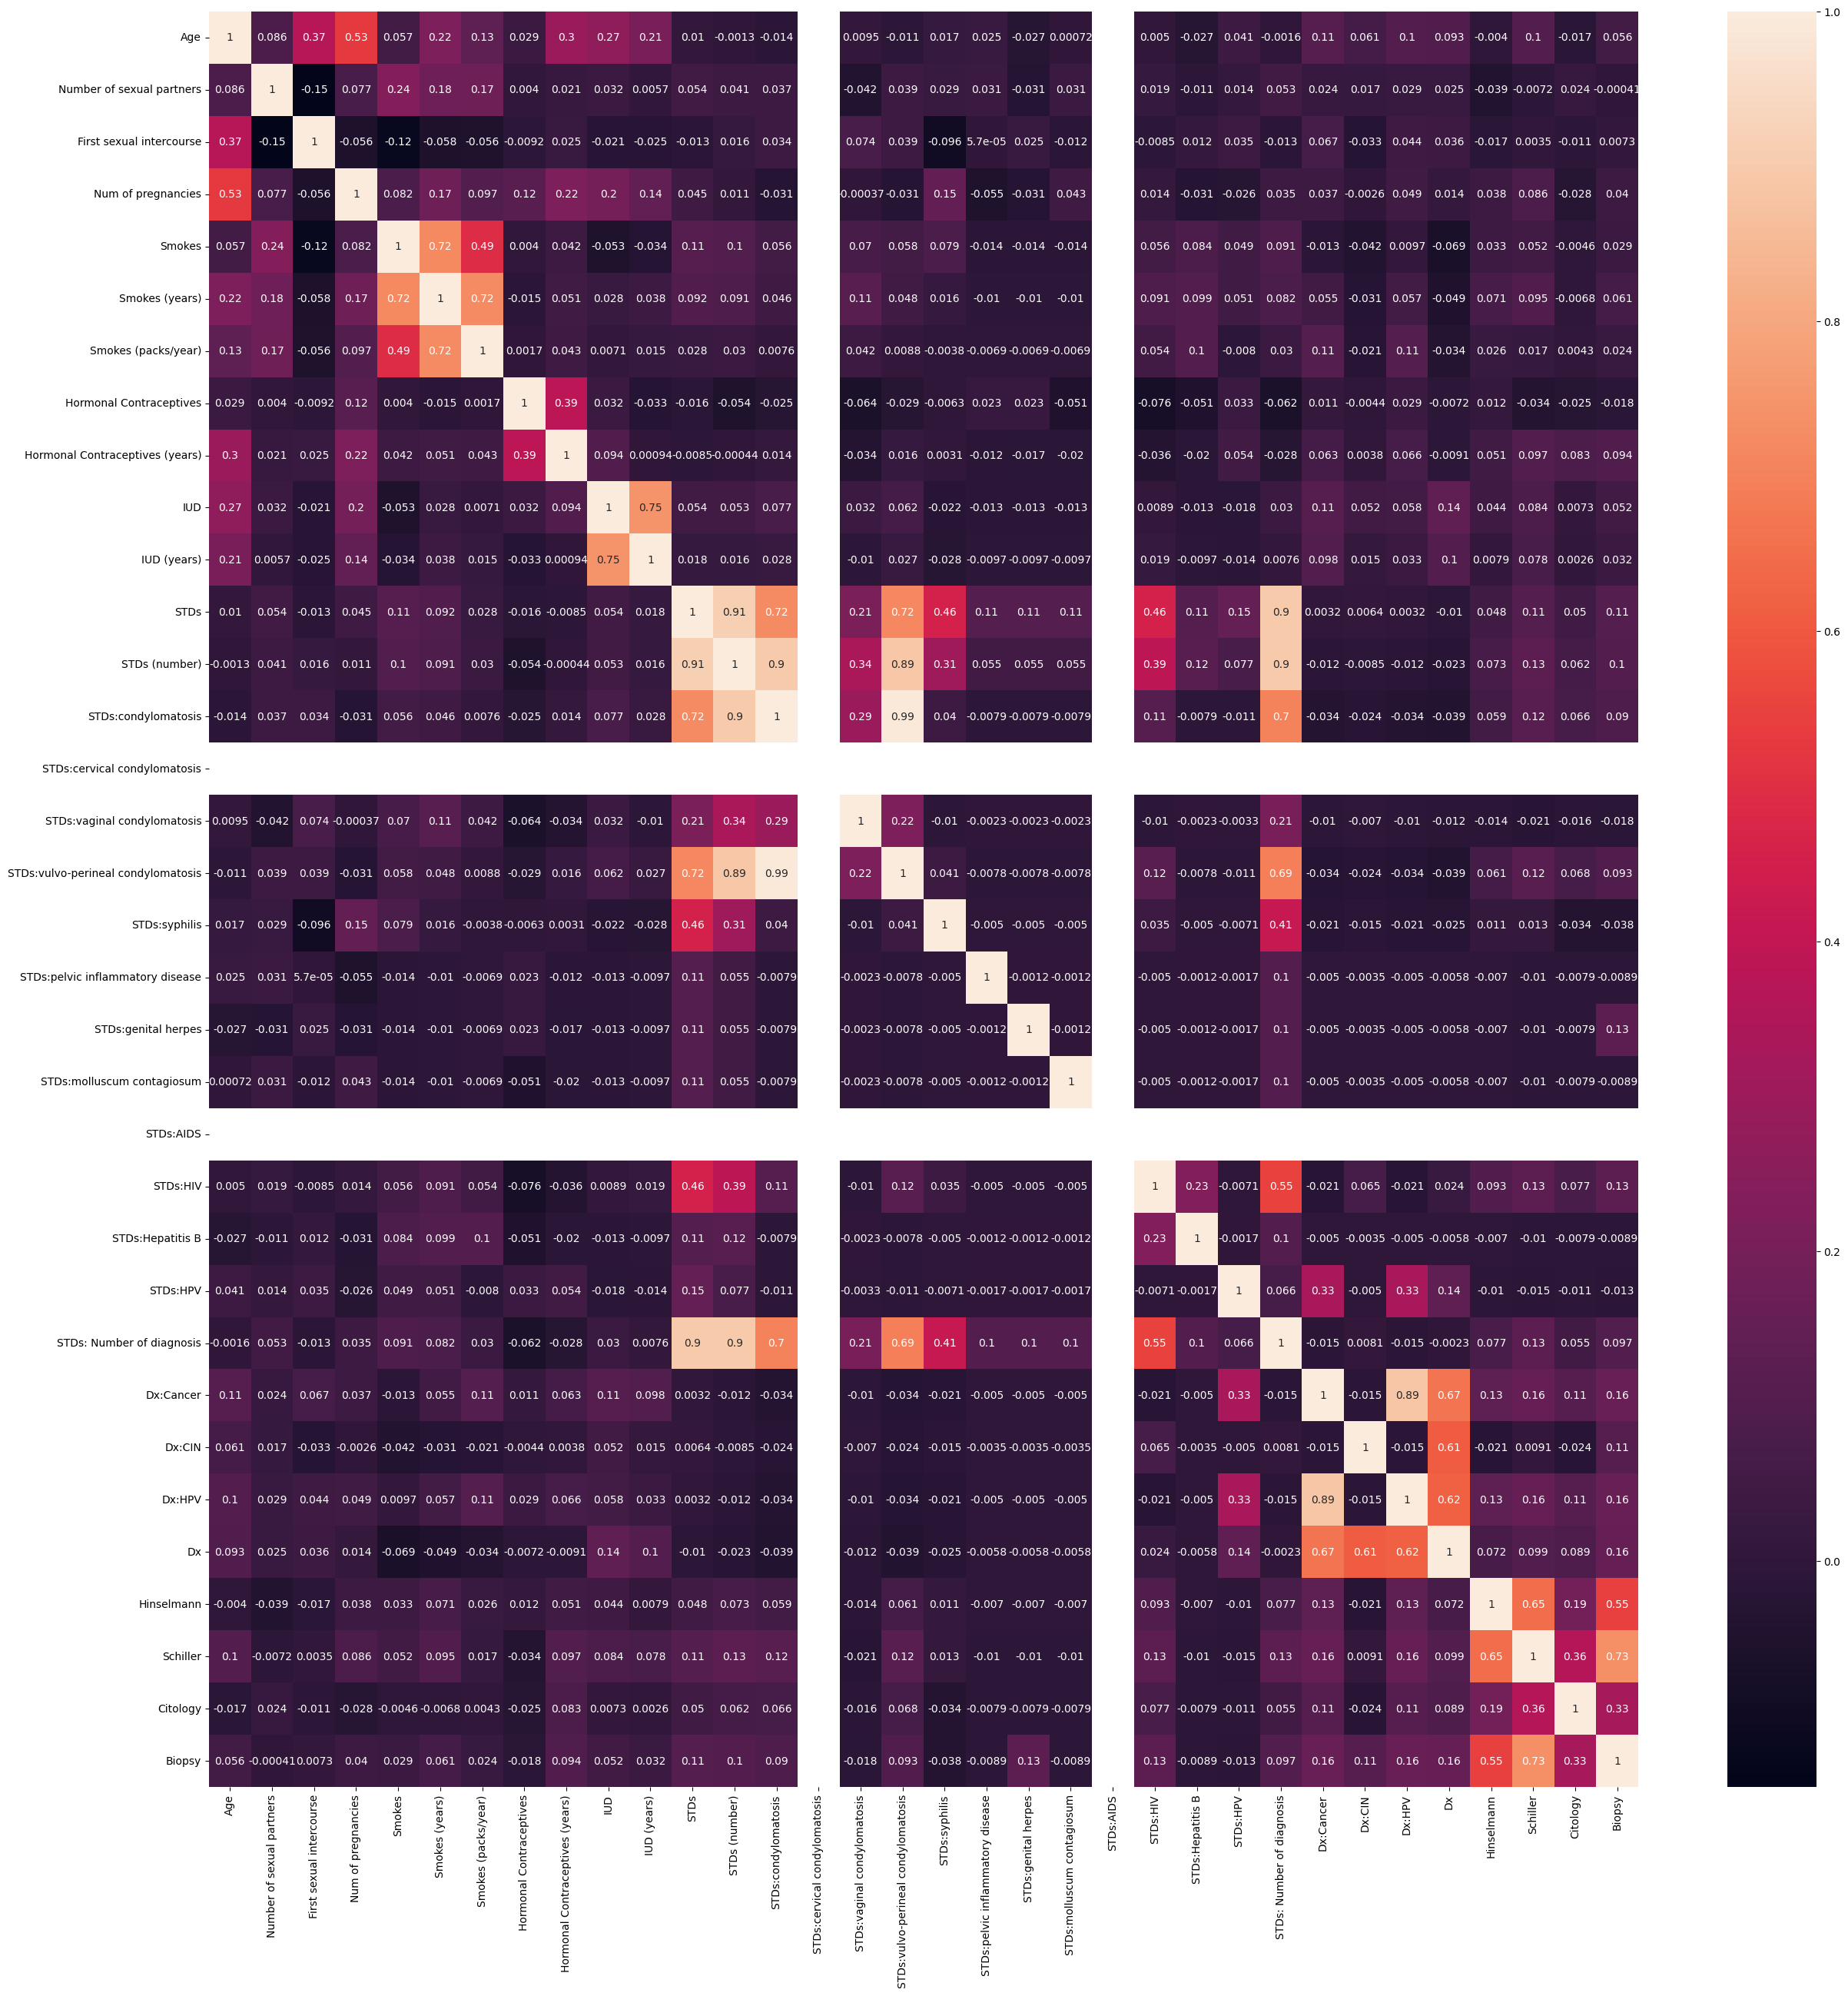

In [15]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr_mat, annot = True)
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (packs/year)'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>]

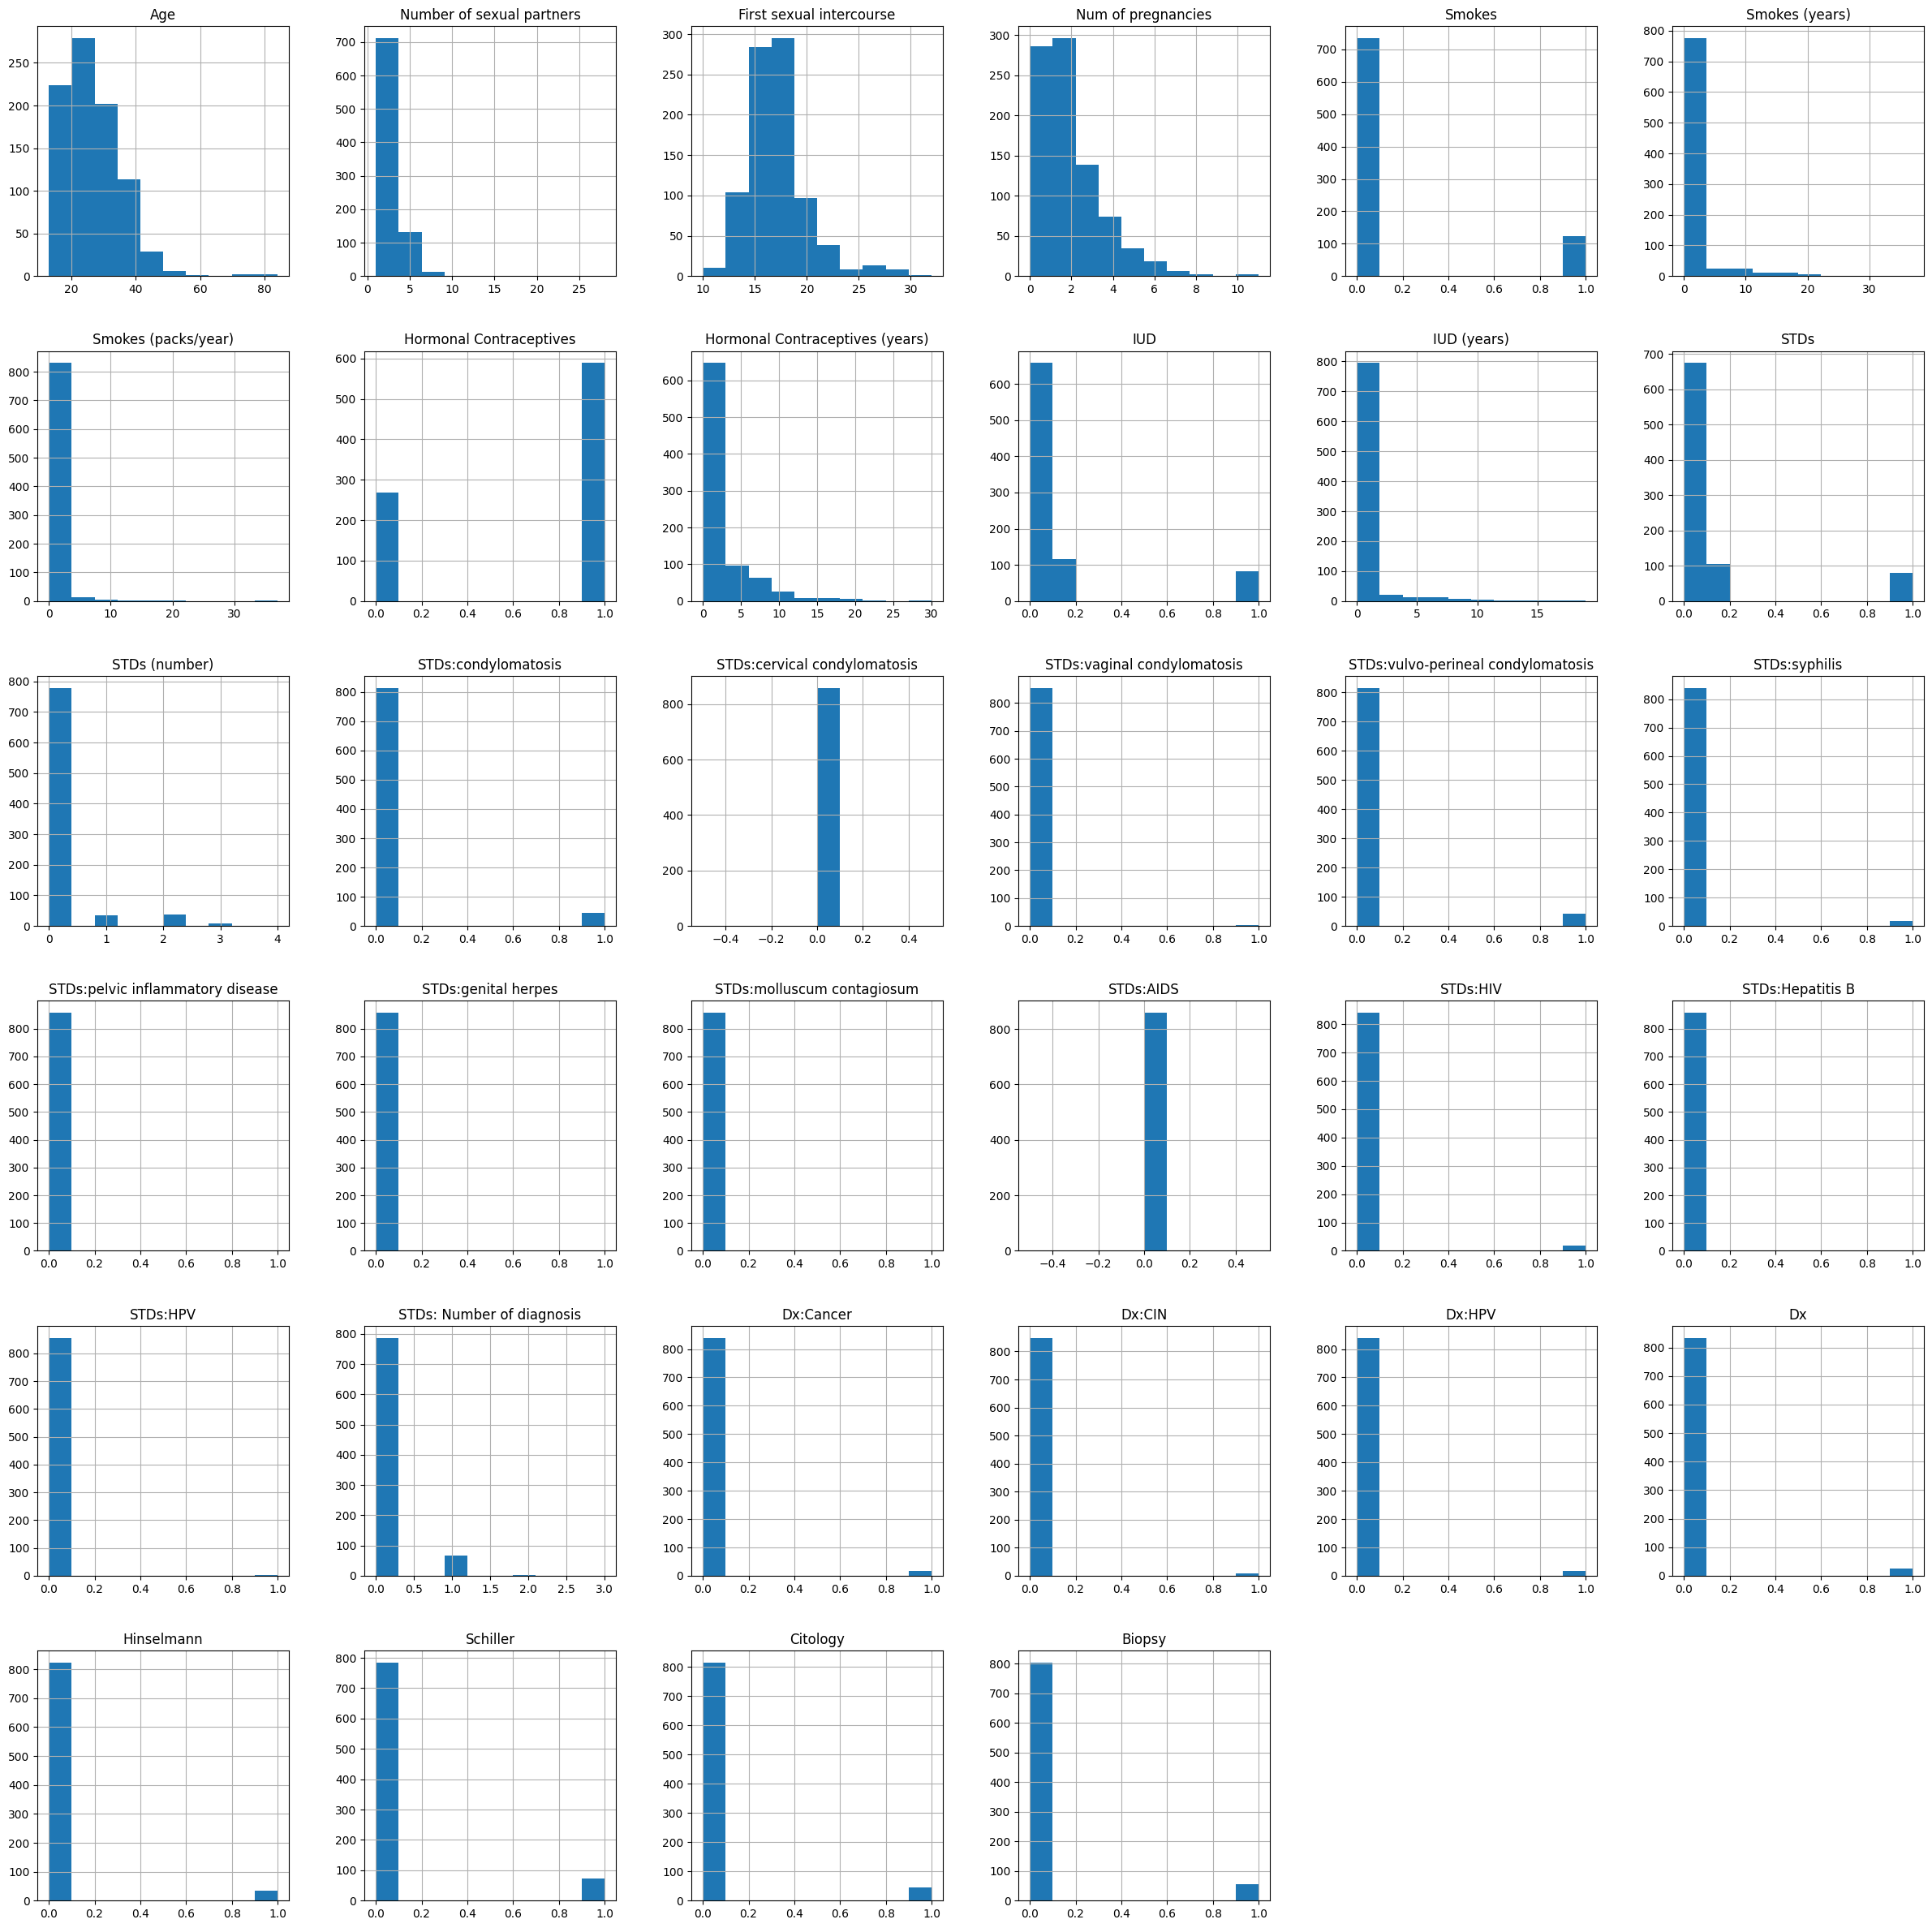

In [16]:
cancer_df.hist(bins = 10, figsize = (30, 30))

In [17]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.219721,0.446278,0.686480,2.035331,0.112011,...,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.057885,2.210351,0.464194,3.567040,0.293260,...,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='STDs (number)', ylabel='count'>

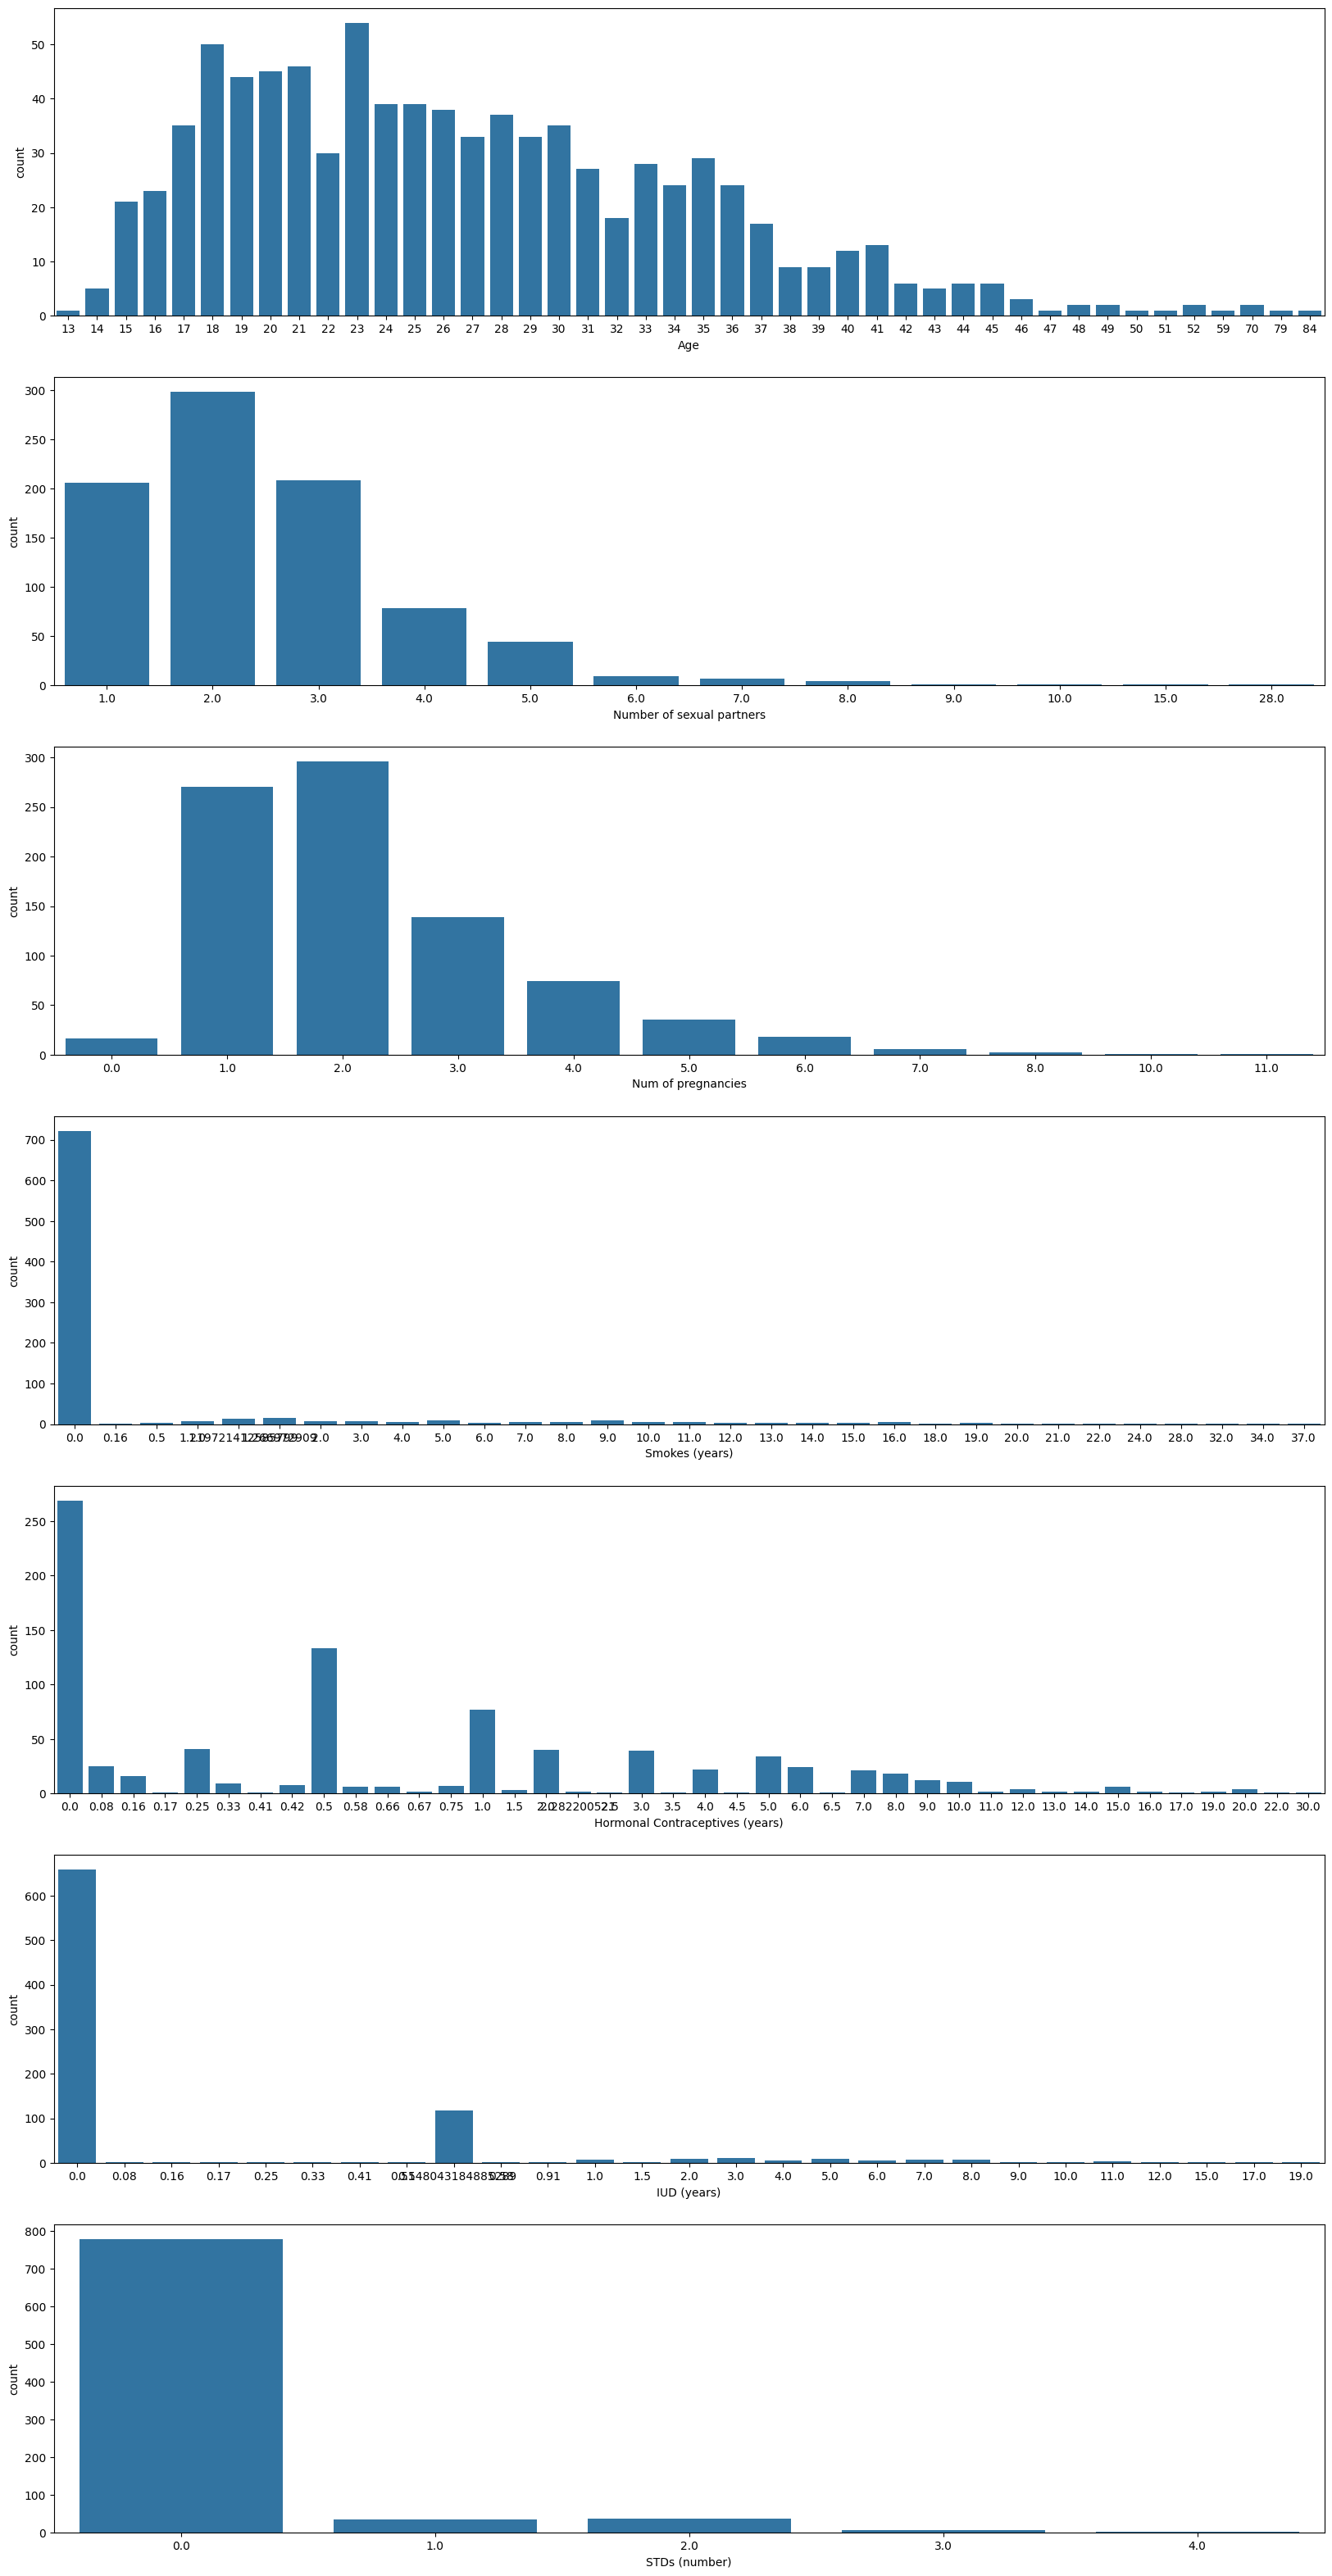

In [18]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, figsize = (20,40))
sns.countplot(x='Age', data=cancer_df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=cancer_df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=cancer_df, ax=ax3)
sns.countplot(x='Smokes (years)', data=cancer_df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=cancer_df, ax=ax5)
sns.countplot(x='IUD (years)', data=cancer_df, ax=ax6)
sns.countplot(x='STDs (number)', data=cancer_df, ax=ax7)

In [19]:
target_df = cancer_df['Biopsy']
input_df = cancer_df.drop(columns = ['Biopsy'])
target_df.shape

(858,)

In [20]:
print(target_df.shape, input_df.shape)

(858,) (858, 33)


In [21]:
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [22]:
input_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.219721,0.446278,0.686480,2.035331,0.112011,...,0.001166,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.057885,2.210351,0.464194,3.567040,0.293260,...,0.034139,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
input_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [24]:
X = input_df.apply(pd.to_numeric, errors='coerce')

y = target_df.apply(pd.to_numeric, errors='coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

# Splitting


In [25]:
from sklearn.model_selection import train_test_split

#for Hinselmann
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
630,26,2.0,18.0,4.0,0.0,0.000000,0.000000,1.0,3.50,0.000000,...,0.0,0.0,0,0,0,0,0,0,0,0
518,24,3.0,18.0,2.0,1.0,1.266973,0.513202,1.0,5.00,0.000000,...,0.0,0.0,0,0,0,0,0,0,0,0
272,23,2.0,17.0,2.0,0.0,0.000000,0.000000,1.0,0.50,0.112011,...,0.0,0.0,0,0,0,0,0,0,0,0
721,34,1.0,15.0,4.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,...,0.0,0.0,0,0,0,0,0,0,0,0
397,19,2.0,16.0,2.0,0.0,0.000000,0.000000,1.0,3.00,0.000000,...,0.0,0.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,15,1.0,14.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,...,0.0,0.0,0,0,0,0,0,0,0,0
165,30,3.0,19.0,2.0,0.0,0.000000,0.000000,1.0,5.00,1.000000,...,0.0,0.0,1,0,0,0,0,0,0,0
7,26,1.0,26.0,3.0,0.0,0.000000,0.000000,1.0,2.00,1.000000,...,0.0,0.0,0,0,0,0,0,0,0,0
219,23,4.0,18.0,1.0,1.0,4.000000,0.513202,1.0,2.00,0.000000,...,0.0,0.0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_cols = X.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()

# Scale training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Scale test data using the same scaler
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [27]:

X_train, y_train = shuffle(X_train, y_train, random_state=40)
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
38,0.366197,0.000000,0.636364,0.363636,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.281690,0.074074,0.500000,0.090909,0.0,0.0,0.0,1.0,0.090909,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
767,0.028169,0.037037,0.136364,0.090909,0.0,0.0,0.0,1.0,0.022727,0.112011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
571,0.126761,0.037037,0.227273,0.181818,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,0.183099,0.000000,0.409091,0.272727,0.0,0.0,0.0,1.0,0.045455,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.126761,0.037037,0.227273,0.272727,0.0,0.0,0.0,1.0,0.272727,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,0.211268,0.037037,0.363636,0.181818,0.0,0.0,0.0,1.0,0.272727,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358,0.112676,0.000000,0.318182,0.090909,0.0,0.0,0.0,1.0,0.090909,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,0.126761,0.037037,0.363636,0.181818,0.0,0.0,0.0,1.0,0.136364,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Fitting

In [28]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
model_AB = AdaBoostClassifier()

# feeding the training data into the model
model_AB.fit(X_train, y_train)

# predicting the test set results
y_pred = model_AB.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model_AB.score(X_train, y_train))
print("Testing accuracy :", model_AB.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

cm_adaBoost= confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_adaBoost)

Training accuracy : 0.9635568513119533
Testing accuracy : 0.9418604651162791
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       161
           1       0.56      0.45      0.50        11

    accuracy                           0.94       172
   macro avg       0.76      0.71      0.73       172
weighted avg       0.94      0.94      0.94       172

[[157   4]
 [  6   5]]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# creating the model
model_l = LogisticRegression()

# feeding the training data into the model
model_l.fit(X_train, y_train)

# predicting the test set results
y_pred = model_l.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model_l.score(X_train, y_train))
print("Testing accuracy :", model_l.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

cm_log= confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_log)

Training accuracy : 0.9664723032069971
Testing accuracy : 0.9593023255813954
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       161
           1       0.75      0.55      0.63        11

    accuracy                           0.96       172
   macro avg       0.86      0.77      0.81       172
weighted avg       0.96      0.96      0.96       172

[[159   2]
 [  5   6]]


In [30]:
import xgboost as xgb 
model_xgb = xgb.XGBClassifier(scale_pos_weight=14, learning_rate = 0.1, max_depth = 5, n_estimators = 10)

model_xgb.fit(X_train, y_train)

# Calculating the accuracies
print("Training accuracy :", model_xgb.score(X_train, y_train))
print("Testing accuracy :", model_xgb.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

cm_xgb = confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_xgb)

Training accuracy : 0.9664723032069971
Testing accuracy : 0.9534883720930233
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       161
           1       0.75      0.55      0.63        11

    accuracy                           0.96       172
   macro avg       0.86      0.77      0.81       172
weighted avg       0.96      0.96      0.96       172

[[159   2]
 [  5   6]]


In [31]:
from sklearn.ensemble import RandomForestClassifier

model_RF= RandomForestClassifier(n_estimators=100, random_state=40)

model_RF.fit(X_train, y_train)

# Calculating the accuracies
print("Training accuracy :", model_RF.score(X_train, y_train))
print("Testing accuracy :", model_RF.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))
cm_randomForest = confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_randomForest)


Training accuracy : 1.0
Testing accuracy : 0.9418604651162791
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       161
           1       0.75      0.55      0.63        11

    accuracy                           0.96       172
   macro avg       0.86      0.77      0.81       172
weighted avg       0.96      0.96      0.96       172

[[159   2]
 [  5   6]]


In [32]:
from sklearn.svm import SVC

# creating the model
model_SVC = SVC(class_weight='balanced', probability=True)

# predicting the test set results
model_SVC.fit(X_train, y_train)

# Calculating the accuracies
print("Training accuracy :", model_SVC.score(X_train, y_train))
print("Testing accuracy :", model_SVC.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))
cm_SVC = confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_SVC)

Training accuracy : 0.967930029154519
Testing accuracy : 0.9534883720930233
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       161
           1       0.75      0.55      0.63        11

    accuracy                           0.96       172
   macro avg       0.86      0.77      0.81       172
weighted avg       0.96      0.96      0.96       172

[[159   2]
 [  5   6]]


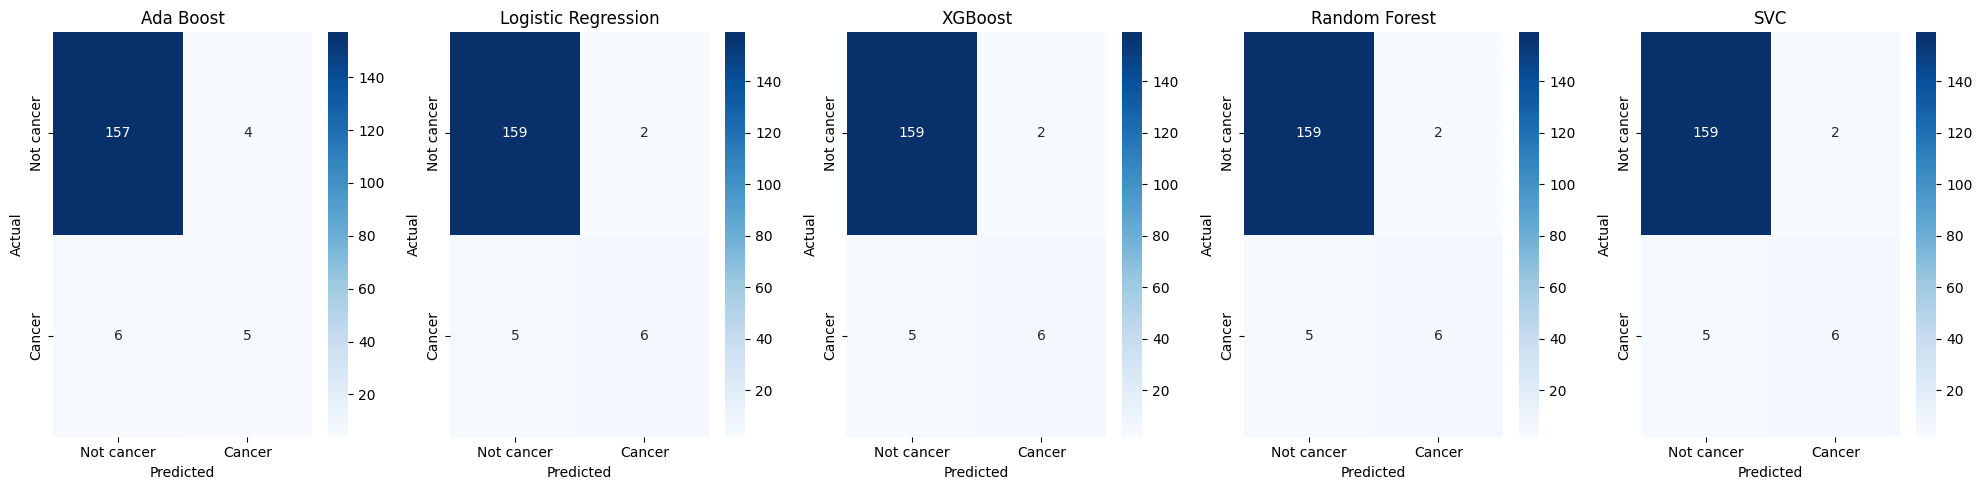

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of class labels (modify if your classes are named differently)
labels = ['Not cancer', 'Cancer']

# Dictionary of confusion matrices with model names
confusion_matrices = {
    "Ada Boost": cm_adaBoost,
    "Logistic Regression": cm_log,
    "XGBoost": cm_xgb,
    "Random Forest": cm_randomForest,
    "SVC": cm_SVC
}

# Create a 1x4 grid of subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Adjust figsize if needed

# Loop through and plot each confusion matrix
for ax, (model_name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=labels, yticklabels=labels)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Tidy up layout
plt.tight_layout()
plt.show()


## ROC_AUC Curve

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test, label=None):
    """
    Plots the ROC curve for a given model.

    Parameters:
    - model: trained classifier with predict_proba()
    - X_test: test features
    - y_test: true labels
    - label: custom label for the curve (e.g., model name)
    """
    if not hasattr(model, "predict_proba"):
        raise ValueError("Model must have a predict_proba() method.")

    y_proba = model.predict_proba(X_test)[:, 1]  # Get positive class probability
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2,
             label=f"{label or model.__class__.__name__} (AUC = {roc_auc:.2f})")


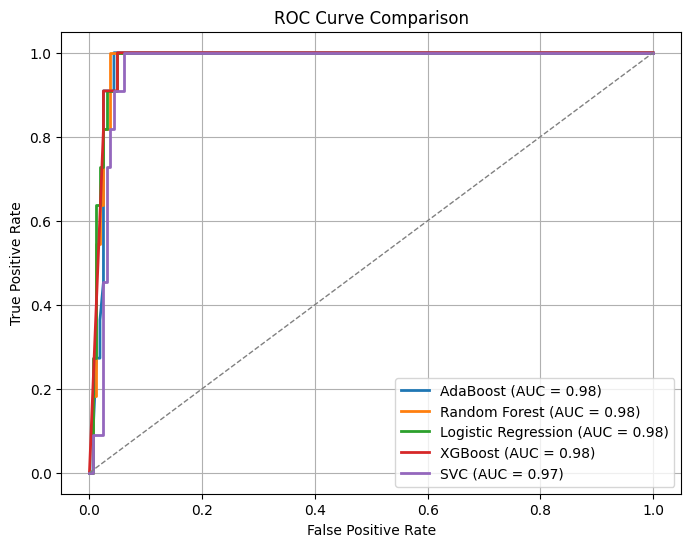

In [35]:
models = {
    "AdaBoost": model_AB,
    "Random Forest": model_RF,
    "Logistic Regression": model_l,
    "XGBoost" : model_xgb,
    "SVC": model_SVC
}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    plot_roc_curve(model, X_test, y_test, label=name)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## K-Folded Cross-Validation

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score

In [37]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)
scoring_metrics = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

In [38]:
results = {}

for name, model in models.items():
    scores = {}
    for metric_name, scoring in scoring_metrics.items():
        cv_scores = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        scores[metric_name] = np.mean(cv_scores)
    results[name] = scores


C:\Users\somes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\somes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [39]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="f1", ascending=False)  # Sort by F1 (or any metric)
print(results_df)


                     accuracy        f1  precision    recall
XGBoost              0.953400  0.703739   0.590801  0.872727
Logistic Regression  0.956882  0.652814   0.685415  0.636364
AdaBoost             0.954549  0.620251   0.676410  0.581818
Random Forest        0.951061  0.562824   0.666825  0.490909
SVC                  0.884605  0.275891   0.232792  0.345455


## XGBoost & Logistic Regression with highest f1 score

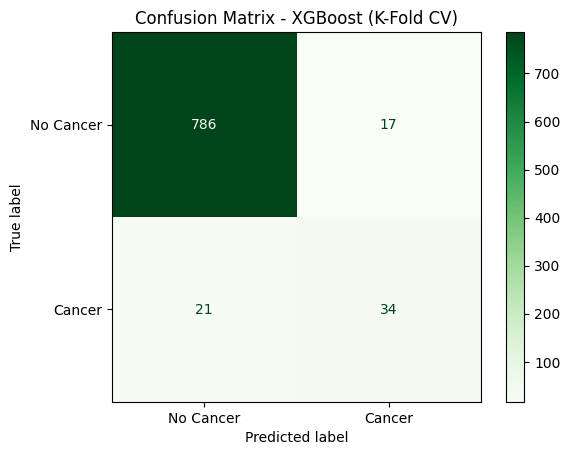

Classification Report - XGBoost (K-Fold CV):
              precision    recall  f1-score   support

   No Cancer     0.9740    0.9788    0.9764       803
      Cancer     0.6667    0.6182    0.6415        55

    accuracy                         0.9557       858
   macro avg     0.8203    0.7985    0.8090       858
weighted avg     0.9543    0.9557    0.9549       858



In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Define the XGBoost model (you can include best hyperparameters if you have them)
xgb_model = XGBClassifier( eval_metric='logloss')

# Get cross-validated predictions
y_pred_xgb_cv = cross_val_predict(xgb_model, X, y, cv=kfold)

# Generate confusion matrix
cm_xgb = confusion_matrix(y, y_pred_xgb_cv)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Cancer', 'Cancer'])
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost (K-Fold CV)")
plt.show()

# Optional: Print classification report
print("Classification Report - XGBoost (K-Fold CV):")
print(classification_report(y, y_pred_xgb_cv, target_names=['No Cancer', 'Cancer'], digits=4))



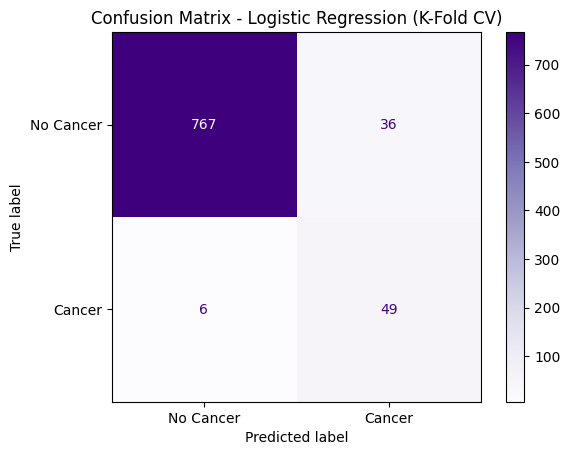

Classification Report - Logistic Regression (K-Fold CV):
              precision    recall  f1-score   support

   No Cancer     0.9922    0.9552    0.9734       803
      Cancer     0.5765    0.8909    0.7000        55

    accuracy                         0.9510       858
   macro avg     0.7844    0.9230    0.8367       858
weighted avg     0.9656    0.9510    0.9558       858



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Create a pipeline: Standardize → Logistic Regression
log_model = make_pipeline(
    MinMaxScaler(),
    LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
)

# Get cross-validated predictions
y_pred_log_cv = cross_val_predict(log_model, X, y, cv=kfold)

# Generate confusion matrix
cm_log = confusion_matrix(y, y_pred_log_cv)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['No Cancer', 'Cancer'])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression (K-Fold CV)")
plt.show()

# Print classification report
print("Classification Report - Logistic Regression (K-Fold CV):")
print(classification_report(y, y_pred_log_cv, target_names=['No Cancer', 'Cancer'], digits=4))


## BELOW IS FOR XGBOOSTER

## --------------------------------------------------------------------

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [43]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
    'gamma': [0, 1, 5],  # Regularization
    'reg_alpha': [0, 0.1, 1],  # L1
    'reg_lambda': [1, 5, 10] 
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Avoid warning

# grid_search = GridSearchCV(estimator=xgb, 
#                            param_grid=param_grid,
#                            scoring='f1',  # Focus on improving F1-score
#                            cv=5, 
#                            n_jobs=-1, 
#                            verbose=1)

# grid_search.fit(X, y)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X, y)




Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\somes\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:20:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1]},
                   random_state=42, scoring='f1', verbose=1)

In [44]:
# print("Best parameters:", grid_search.best_params_)
# print("Best F1-score from GridSearch:", grid_search.best_score_)

print("Best parameters:", random_search.best_params_)
print("Best F1-score:", random_search.best_score_)

Best parameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 1}
Best F1-score: 0.745025641025641


Training accuracy : 0.9606413994169096
Confusion Matrix of trained data:  [[621  21]
 [  6  38]]
Testing accuracy : 0.9651162790697675
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       161
           1       0.67      0.91      0.77        11

    accuracy                           0.97       172
   macro avg       0.83      0.94      0.88       172
weighted avg       0.97      0.97      0.97       172



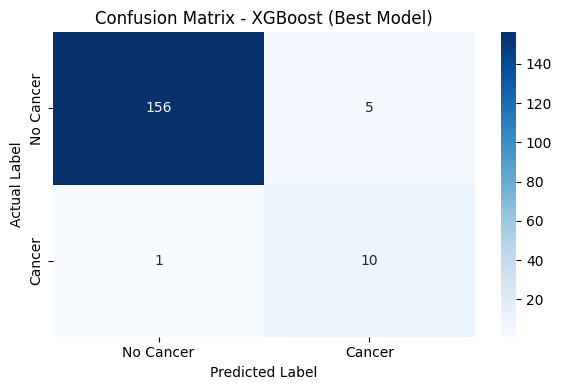

In [46]:
from sklearn.metrics import classification_report

best_model_xgb = random_search.best_estimator_
y_pred_train= best_model_xgb.predict(X_train)
y_pred = best_model_xgb.predict(X_test)

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred)
cm_xgb_train = confusion_matrix(y_train, y_pred_train)

# Calculating the accuracies
print("Training accuracy :", best_model_xgb.score(X_train, y_train))
print("Confusion Matrix of trained data: ", cm_xgb_train)
print("Testing accuracy :", best_model_xgb.score(X_test, y_test))

print(classification_report(y_test, y_pred))

# Define class names 
class_names = ['No Cancer', 'Cancer']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - XGBoost (Best Model)')
plt.tight_layout()
plt.show()


## BELOW IS FOR LOGISTIC REGRESSION 
## -------------------------------------------------

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define the logistic regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')

# Create pipeline with scaler
logreg_pipeline = make_pipeline(MinMaxScaler(), logreg)

# Define parameter grid
param_grid = {
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],   # Regularization types
    'logisticregression__C': np.logspace(-4, 4, 20),              # Inverse of regularization strength
    'logisticregression__l1_ratio': np.linspace(0, 1, 10)         # Only used if penalty='elasticnet'
}

# Randomized search with cross-validation
random_search_log = RandomizedSearchCV(
    estimator=logreg_pipeline,
    param_distributions=param_grid,
    n_iter=50,                  # Number of random combinations to try
    scoring='f1',               # Optimize for F1-score
    cv=5,                       # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_log.fit(X, y)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\somes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('logisticregression',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=1000,
                                                                 solver='saga'))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'logisticregression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.3598182...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'logisticregression__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'logisticregression__penalty': ['l1',
                                                                        'l2',
                                                                        'elasticnet']},
                   random_state=42, scoring='f1', verbose=1)

In [48]:

print("Best parameters:", random_search_log.best_params_)
print("Best F1-score:", random_search_log.best_score_)

Best parameters: {'logisticregression__penalty': 'l1', 'logisticregression__l1_ratio': np.float64(0.8888888888888888), 'logisticregression__C': np.float64(0.08858667904100823)}
Best F1-score: 0.745025641025641


Training accuracy: 0.9606413994169096
cinfusin matrix for trained data:  [[621  21]
 [  6  38]]
Testing accuracy: 0.9651162790697675
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

   No Cancer       0.99      0.97      0.98       161
      Cancer       0.67      0.91      0.77        11

    accuracy                           0.97       172
   macro avg       0.83      0.94      0.88       172
weighted avg       0.97      0.97      0.97       172



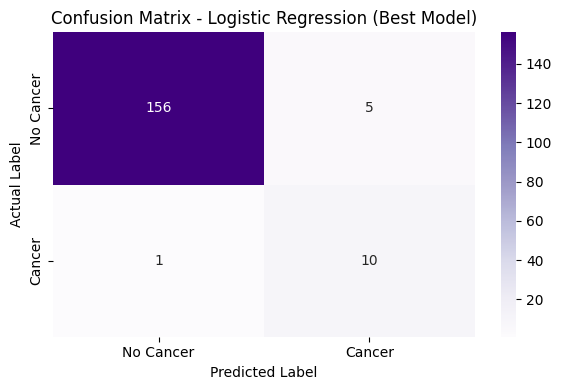

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Use the best estimator from your RandomizedSearchCV
best_log_model = random_search_log.best_estimator_

# Make predictions
y_pred_log_train= best_log_model.predict(X_train)
y_pred_log = best_log_model.predict(X_test)

# Compute confusion matrix
cm_log_train=  confusion_matrix(y_train, y_pred_log_train)
cm_log = confusion_matrix(y_test, y_pred_log)

# Calculate and print accuracies
print("Training accuracy:", best_log_model.score(X_train, y_train))
print("cinfusin matrix for trained data: ", cm_log_train)
print("Testing accuracy:", best_log_model.score(X_test, y_test))

# Print classification report
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=['No Cancer', 'Cancer']))

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'])

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Logistic Regression (Best Model)')
plt.tight_layout()
plt.show()

In [50]:
## Model's Result on Test data

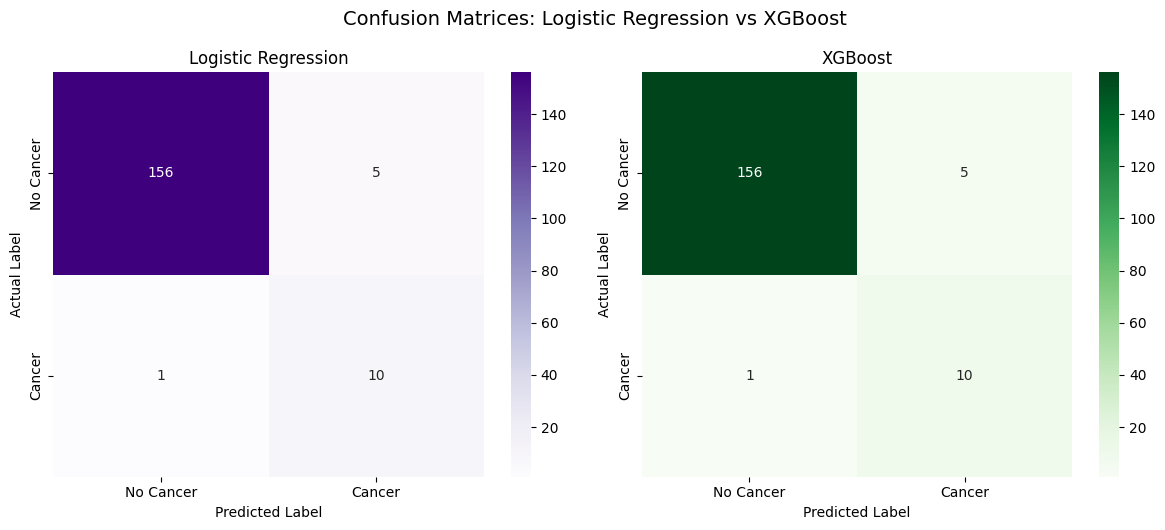

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels
class_names = ['No Cancer', 'Cancer']

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Actual Label")

# XGBoost Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("Actual Label")

# Improve spacing and layout
plt.tight_layout()
plt.suptitle("Confusion Matrices: Logistic Regression vs XGBoost", fontsize=14, y=1.05)
plt.show()


## Since both are giving same results on training and test data, We can use both as the model after hypertuning

The Results are :
🔹 Training Data:
Accuracy: 96.1%, Precision: 64.4%, Recall: 86.4%, F1-Score: 73.8% (Confusion Matrix: [[621, 21], [6, 38]])

🔹 Test Data:
Accuracy: 96.5%, Precision: 66.7%, Recall: 90.9%, F1-Score: 76.9% (Confusion Matrix: [[156, 5], [1, 10]])